In [1]:
# Import necessary libraries
import re
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, hamming_loss, accuracy_score, confusion_matrix
from google.colab import drive
from os.path import join
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import seaborn as sns
from collections import Counter
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from IPython.display import clear_output
import pickle

# Download stopwords necessary for the tokenization process
nltk.download("stopwords", quiet=True)

True

In [2]:
# Mount Google Drive to access files and define the path to the dataset
drive.mount("/content/drive/", force_remount=False)
DATA_PATH = "/content/drive/My Drive/Colab Notebooks/ML4MDE_Project/"

# Combine the DATA_PATH with the filename to get the complete file path
file = join(DATA_PATH, "dataset.csv")
df = pd.read_csv(file, header=0)

Mounted at /content/drive/


<hr />
<h2>Data Preprocessing</h2>

In [3]:
# Dictionary mapping contractions to their expanded forms
contraction_mapping = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "this's": "this is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "here's": "here is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

# Set of English stop words using nltk
stop_words = set(nltk.corpus.stopwords.words('english'))

# Function to clean text by converting to lowercase, expanding contractions, removing non-alphabetic characters,
# removing stop words, and joining the words into a cleaned string
def clean_text(text: str):
    to_clean = text.lower()
    to_clean = to_clean.replace('"', '')
    to_clean = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in to_clean.split(" ")])
    to_clean = re.sub("[^a-zA-Z]", " ", to_clean)
    words = [word for word in to_clean.split() if word not in stop_words and len(word) > 1]
    return " ".join(words).strip()

In [4]:
# Apply the clean_text function to each comment_text in the DataFrame and update the column with the cleaned text
df["comment_text"] = df["comment_text"].apply(clean_text)

# Extract the cleaned comment_text as input features (X) and corresponding labels (y)
X = df["comment_text"].values
y = df[df.columns[2:]].values

<ipython-input-5-52bcbb327fdf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.values, y=counts.index, palette='viridis')


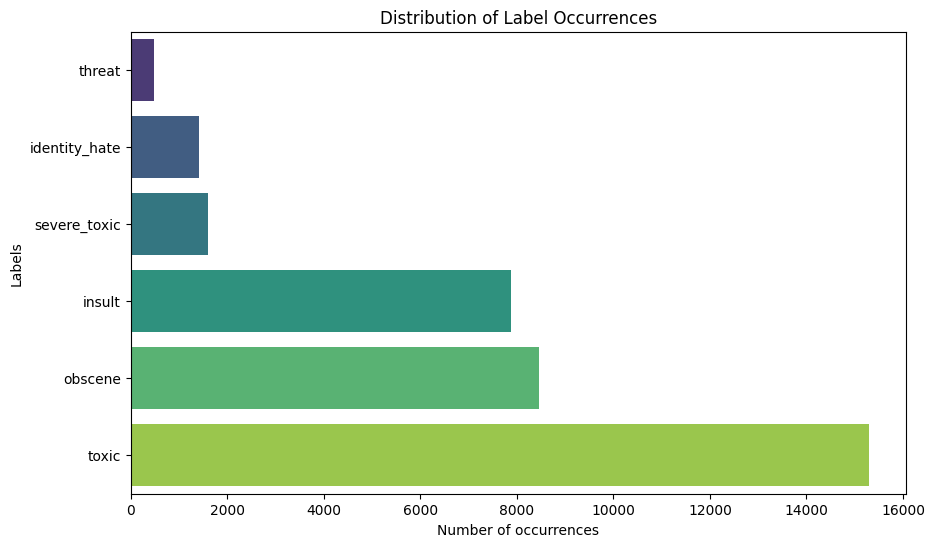

The exact values for each class are:


threat             478
identity_hate     1405
severe_toxic      1595
insult            7877
obscene           8449
toxic            15294
dtype: int64

In [5]:
# Count the occurencies of each labels.
labels = df.columns.tolist()[2:]
counts = df[labels].sum().sort_values()

# Creating an horizontal bar graph.
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=counts.values, y=counts.index, palette='viridis')

# Adding labels and title to the graph.
plt.xlabel('Number of occurrences')
plt.ylabel('Labels')
plt.title('Distribution of Label Occurrences')

# Show graph
plt.show()
print(f"The exact values for each class are:")
df[labels].sum().sort_values()

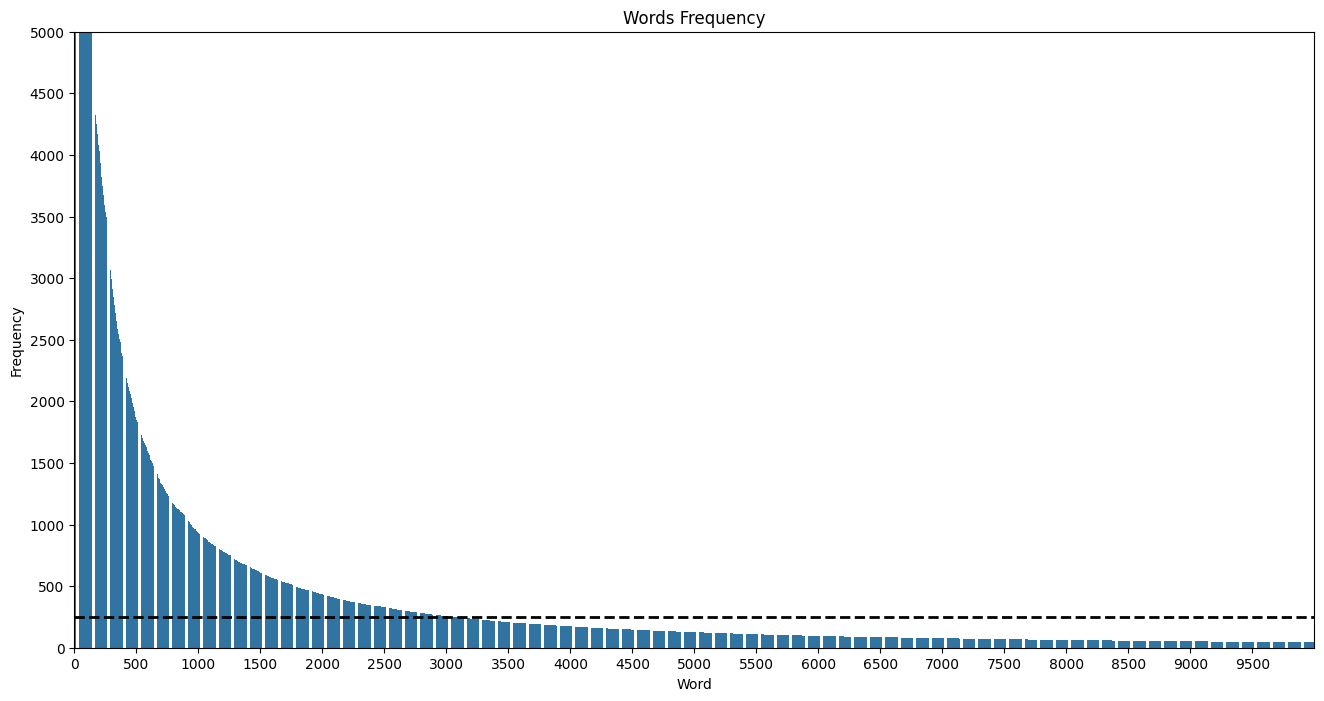

In [6]:
# Flatten the list of words from all comments after splitting each comment
words = [word for comment in X for word in comment.split()]
word_counts = Counter(words)

N = 10000 # Number of words to plot
interval = 500 # Interval for x-axis labels

# Get the N most common words and their frequencies
top_words = word_counts.most_common(N)
words, frequencies = zip(*top_words)

# Plot the word frequencies using Seaborn
plt.figure(figsize=(16, 8))
sns.barplot(x=range(len(words)), y=frequencies)
plt.title(f"Words Frequency")
plt.xlabel("Word")
plt.ylabel("Frequency")

# Build x-axis labels
x_labels = [f"{i * interval}" for i in range(N // interval)]

# Set x-axis labels
plt.xticks(range(0, N, interval), x_labels)

# Set y-axis limits and labels
plt.ylim(0, 5000)
plt.yticks(range(0, 5000 + 1, interval))

# Horizontal line
plt.axhline(y=250, color="black", linestyle='--', linewidth=2)

# Display the plot
plt.show()

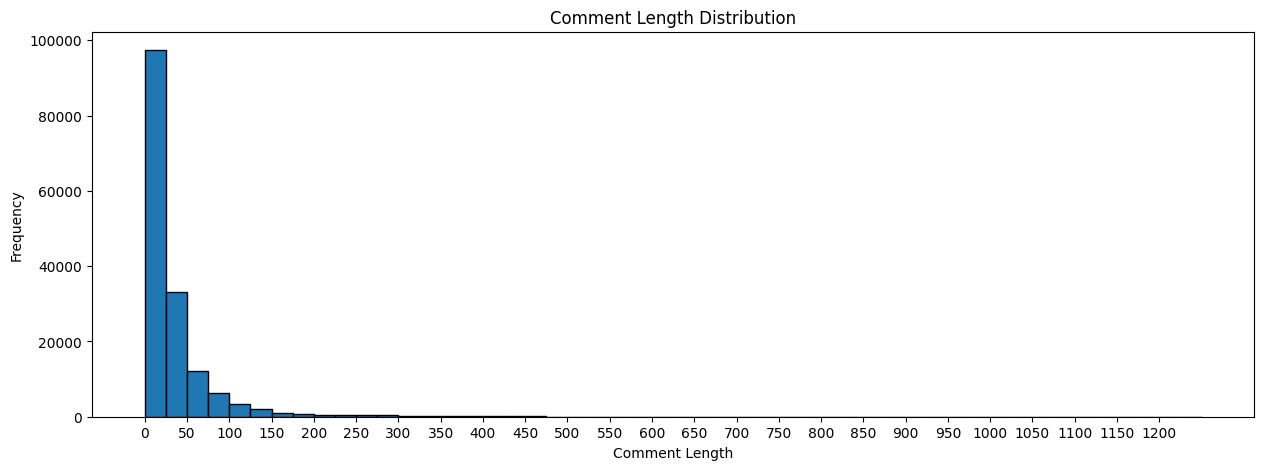

In [7]:
# Calculate the length of each comment in terms of the number of words
sentence_lengths = [len(comment.split()) for comment in X]

# Plot the distribution of comment lengths using a histogram
plt.figure(figsize=(15, 5))
plt.hist(sentence_lengths, bins=50, edgecolor="black")
plt.title("Comment Length Distribution")
plt.xlabel("Comment Length")
plt.ylabel("Frequency")

# Set x-axis labels
plt.xticks(range(0, 1200 + 1, 50))

# Display the plot
plt.show()

In [8]:
# Text Vectorization
MAX_FEATURES = 3000 # Maximum number of unique words to consider
MAX_SEQUENCE = 100 # Maximum length of sequences
vectorizer = TextVectorization(max_tokens=MAX_FEATURES, output_sequence_length=MAX_SEQUENCE, output_mode='int')
vectorizer.adapt(X)

pickle.dump({'config': vectorizer.get_config(),
             'weights': vectorizer.get_weights()}
            , open("tv_layer.pkl", "wb"))

X = np.array(vectorizer(X))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [9]:
# Build the Neural Network.
NUM_EPOCHS = 5
BATCH_SIZE = 32

model = Sequential()

model.add(Embedding(MAX_FEATURES + 1, 32))

model.add(Bidirectional(LSTM(32, activation="tanh")))

model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))

model.add(Dense(6, activation="sigmoid"))

model.compile(loss="BinaryCrossentropy", metrics=["accuracy"], optimizer="Adam")

In [10]:
# K-FOLD CROSS VALIDATION
NUM_FOLDS = 10 # Number of folds for cross-validation
KF = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=10) # K-Fold splitter

print("K Cross Fold Validation START")
index = 1
for train_index, val_index in KF.split(X_train):
  print(f"Fold {index}")

  # Split the data into training and validation sets for the current fold
  X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
  y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

  # Train the model on the current fold
  model.fit(X_fold_train, y_fold_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_fold_val, y_fold_val))

  # Evaluate the model on the validation set of the current fold
  scores = model.evaluate(X_fold_val, y_fold_val)

  print(f"Fold {index} => Loss: {scores[0]:.2f} and Accuracy: {scores[1]*100:.2f}%")
  index += 1

print("K Cross Fold Validation END")

K Cross Fold Validation START
Fold 1
Epoch 1/5
3591/3591 [==============================] - 119s 31ms/step - loss: 0.0706 - accuracy: 0.9908 - val_loss: 0.0568 - val_accuracy: 0.9934
Epoch 2/5
3591/3591 [==============================] - 64s 18ms/step - loss: 0.0555 - accuracy: 0.9936 - val_loss: 0.0538 - val_accuracy: 0.9935
Epoch 3/5
3591/3591 [==============================] - 57s 16ms/step - loss: 0.0526 - accuracy: 0.9904 - val_loss: 0.0540 - val_accuracy: 0.9934
Epoch 4/5
3591/3591 [==============================] - 58s 16ms/step - loss: 0.0498 - accuracy: 0.9930 - val_loss: 0.0538 - val_accuracy: 0.9934
Epoch 5/5
399/399 [==============================] - 2s 6ms/step - loss: 0.0547 - accuracy: 0.9933
Fold 1 => Loss: 0.05 and Accuracy: 99.33%
Fold 2
Epoch 1/5
3591/3591 [==============================] - 59s 16ms/step - loss: 0.0464 - accuracy: 0.9924 - val_loss: 0.0456 - val_accuracy: 0.9953
Epoch 2/5
3591/3591 [==============================] - 60s 17ms/step - loss: 0.0440 - acc

In [11]:
# Train the model with the entire dataset.
model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)

# Display a summary of the model architecture and parameters
model.summary()

Epoch 1/5
3990/3990 [==============================] - 50s 13ms/step - loss: 0.0105 - accuracy: 0.9421
Epoch 2/5
3990/3990 [==============================] - 49s 12ms/step - loss: 0.0096 - accuracy: 0.9453
Epoch 3/5
3990/3990 [==============================] - 52s 13ms/step - loss: 0.0094 - accuracy: 0.9367
Epoch 4/5
3990/3990 [==============================] - 50s 12ms/step - loss: 0.0094 - accuracy: 0.9293
Epoch 5/5
3990/3990 [==============================] - 52s 13ms/step - loss: 0.0089 - accuracy: 0.9316
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          96032     
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 de

In [12]:
# Calculate metrics (Precision, Recall, Accuracy)
precision = Precision()
recall = Recall()
accuracy = CategoricalAccuracy()

y_predicted = model.predict(X_test)
y_predicted = (y_predicted > 0.5).astype(int)

# Calculate metrics.
precision.update_state(y_test, y_predicted)
precision_value = precision.result().numpy()
recall.update_state(y_test, y_predicted)
recall_value = recall.result().numpy()
accuracy.update_state(y_test, y_predicted)
accuracy_value = accuracy.result().numpy()
hamming_loss_value = hamming_loss(y_test, y_predicted)
f1_value = (2 * precision_value * recall_value) / (precision_value + recall_value)

print(f"Precision: {precision_value:.2f}")
print(f"Recall:{recall_value:.2f}")
print(f"Accuracy:{accuracy_value:.2f}")
print(f"Hamming Loss: {hamming_loss_value:.2f}")
print(f"F-1 Score: {f1_value:.2f}")

998/998 [==============================] - 7s 6ms/step
Precision: 0.65
Recall:0.64
Accuracy:0.99
Hamming Loss: 0.03
F-1 Score: 0.64


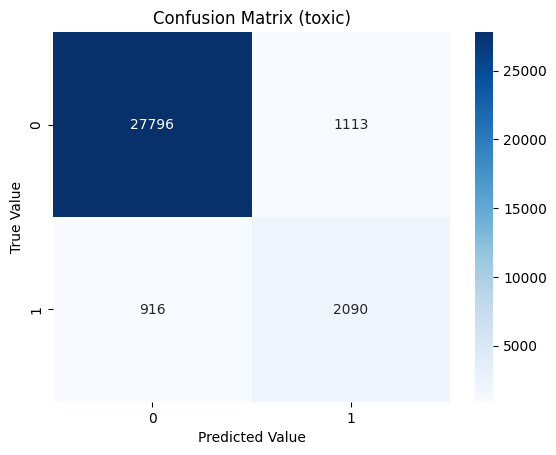

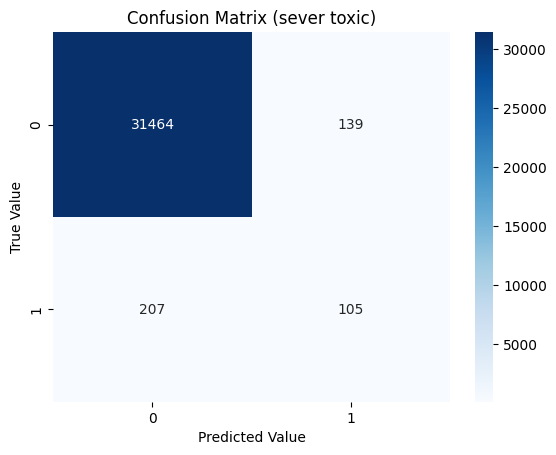

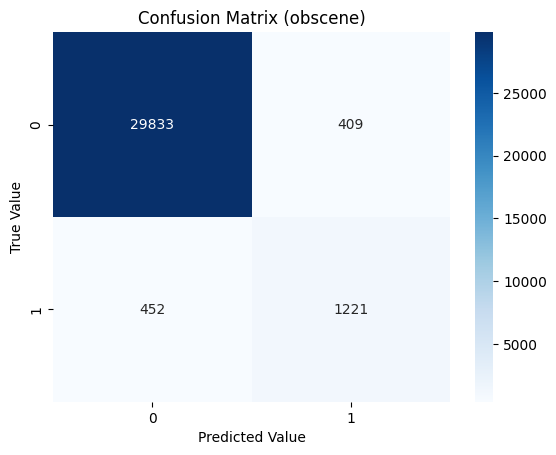

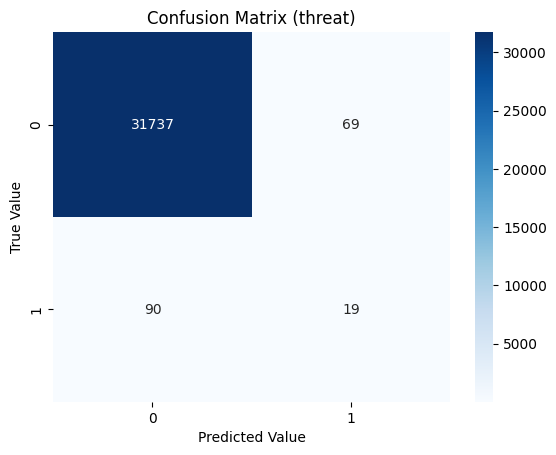

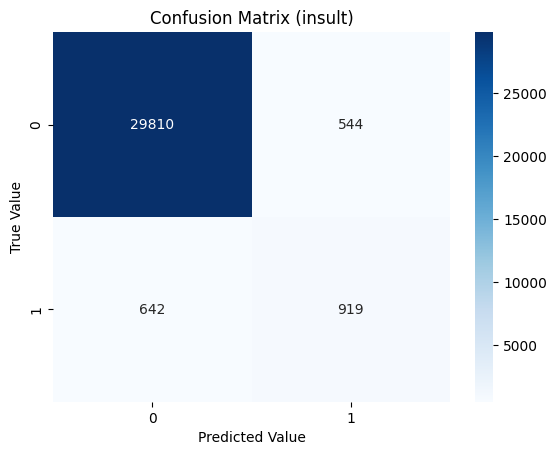

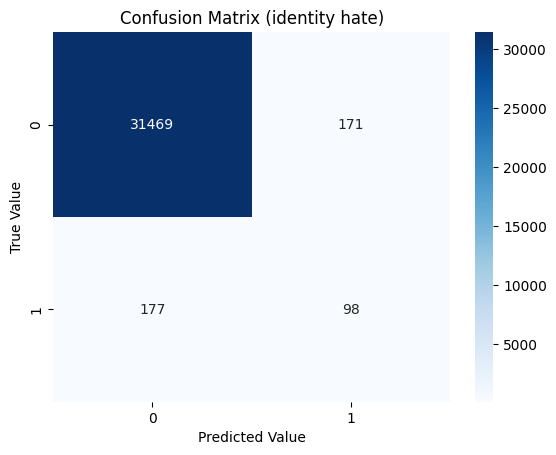

In [13]:
# List of labels corresponding to each toxicity category
labels = ["toxic", "sever toxic", "obscene", "threat", "insult", "identity hate"]

for label in range(6):
  # Extract the true labels and predicted labels for the specific toxicity category
  y_test_i = [row[label] for row in y_test]
  y_predicted_i = [row[label] for row in y_predicted]

  # Creating confusion matrix.
  CM = confusion_matrix(y_test_i, y_predicted_i)

  # Showing confusion matrix as a heatmap.
  sns.heatmap(CM, annot=True, fmt="d", cmap="Blues")
  plt.xlabel("Predicted Value")
  plt.ylabel("True Value")
  plt.title(f"Confusion Matrix ({labels[label]})")
  plt.show()

In [14]:
# Save the models.
model.save('toxicity.h5')
model.save('toxicity.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
# Load a pre-trained TensorFlow/Keras model from the specified file
model = tf.keras.models.load_model("toxicity.h5")

In [16]:
# Load model
model = tf.keras.models.load_model("toxicity.h5")

# Load the configuration and weights of the TextVectorization layer from the pickle file
from_disk = pickle.load(open("tv_layer.pkl", "rb"))

# Create a new TextVectorization layer using the loaded configuration
new_v = TextVectorization.from_config(from_disk['config'])

# Call `adapt` with some dummy data to set up the state of the TextVectorization layer (BUG in Keras)
new_v.adapt(tf.data.Dataset.from_tensor_slices(["xyz"]))

# Set the weights of the new TextVectorization layer to the loaded weights
new_v.set_weights(from_disk['weights'])

# Function to generate a pretty prediction for a given comment
def pretty_prediction(comment):
  # Vectorize the input comment using the new TextVectorization layer
  vectorized = new_v([comment])

  # Make a prediction using the loaded model
  predicted = model.predict(vectorized)

  result = "Comment has been classified as: "
  labels_strings = []

  for index, label in enumerate(labels):
    if predicted[0][index] > 0.5:
      labels_strings.append(label)

  if len(labels_strings) == 0: labels_strings.append("good")

  return result + ", ".join(labels_strings)

In [17]:
# Play with the model.

# Set up a loop for interactive interaction with the model
stop = False
print("Write \"stop\" if you want to quit.")

# Continue interaction until the user inputs "stop"
while not stop:
  # Clear the output for a clean display
  clear_output(wait=True)

  # Prompt the user to input a comment
  comment = input("Insert Comment: ")

  if comment == 'stop':
    # Exit the loop if the user inputs "stop"
    stop = True
  else:
    # Get and print the model's prediction for the input comment
    print(pretty_prediction(comment))

Insert Comment: stop
